In [1]:
%cd ./../src
%load_ext autoreload
%autoreload 2

/home/trygve/development/skole/advanced_nlp/TDT13-advanced-nlp/src


In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from data_util import *

from data_util import fetch_dataset

In [3]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [19]:
raw_df = fetch_dataset("./../data/dataset_fr_train.json")
raw_df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller - Article n'a fonctionné qu'une...,Brumisateur à pompe,fr,beauty
1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez être déçu achetez le produit ! ...,Insatisfaisant,fr,baby_product
2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,"Écran de mauvaise qualité, car il s'use en peu...",Ne recommande pas,fr,pc
3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne sert à rien les sons sont pourris...,A éviter!,fr,musical_instruments
4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit mais la grue n'a pas fonctio...,Déçue,fr,toy
...,...,...,...,...,...,...,...,...
199995,fr_0907472,product_fr_0369223,reviewer_fr_0155780,5,Très jolies boucles! Très belle qualité ! Elle...,Top,fr,jewelry
199996,fr_0345478,product_fr_0271680,reviewer_fr_0933970,5,Superbe. Ultra rapide. Tres bel écran. Il y a ...,Confirme à sa reputation de smartphone le plus...,fr,wireless
199997,fr_0195162,product_fr_0132362,reviewer_fr_0820277,5,facile d'utilisation mais un peu lourd,pratique,fr,kitchen
199998,fr_0250763,product_fr_0966190,reviewer_fr_0485706,5,livré vite et bon produit,livré vite et bon produit,fr,beauty


In [24]:
raw_df["product_category"].value_counts()

home                        28589
wireless                    26206
home_improvement            13105
toy                         12503
pc                           9691
sports                       8419
beauty                       8227
book                         8210
electronics                  8209
drugstore                    6040
kitchen                      5959
automotive                   5825
apparel                      5771
lawn_and_garden              5474
pet_products                 5393
furniture                    5393
other                        4974
baby_product                 4895
office_product               4711
personal_care_appliances     3211
luggage                      2896
camera                       2551
jewelry                      2360
shoes                        2120
video_games                  1870
digital_ebook_purchase       1785
industrial_supplies          1562
watch                        1474
grocery                      1373
musical_instru

In [25]:
df = pd.read_csv("./../train_csv_2022-11-24 15:55:47.347598", index_col=0)
df

,val_loss,val_acc,val_off_by_1,train_loss,train_acc,train_off_by_1,epoch_time_s
0,0.155234,0.3324,0.6338,0.159725,0.247280,0.606280,36.728368
1,0.140926,0.3826,0.7366,0.148786,0.353080,0.675915,35.937290
2,0.136004,0.4052,0.7846,0.140348,0.393115,0.751755,35.539731
3,0.124700,0.4292,0.8188,0.132745,0.410070,0.794350,36.500147
4,0.120910,0.4522,0.8460,0.126959,0.428715,0.823995,38.044353
5,0.118011,0.4726,0.8672,0.123508,0.446015,0.844260,37.257808
6,0.116358,0.4828,0.8774,0.121112,0.460330,0.858280,36.972266
7,0.114795,0.4906,0.8852,0.119254,0.471885,0.868505,37.213167
8,0.113727,0.4912,0.8832,0.117958,0.480645,0.875275,38.300097
9,0.113041,0.4996,0.8906,0.116775,0.484040,0.880955,36.555225


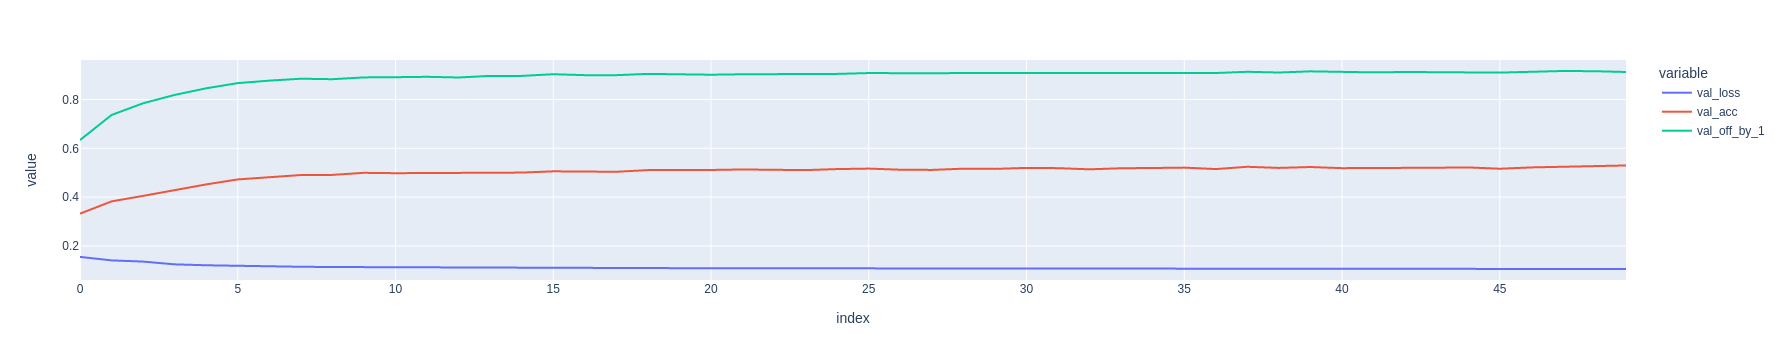

In [26]:
px.line(df[["val_loss","val_acc", "val_off_by_1"]])

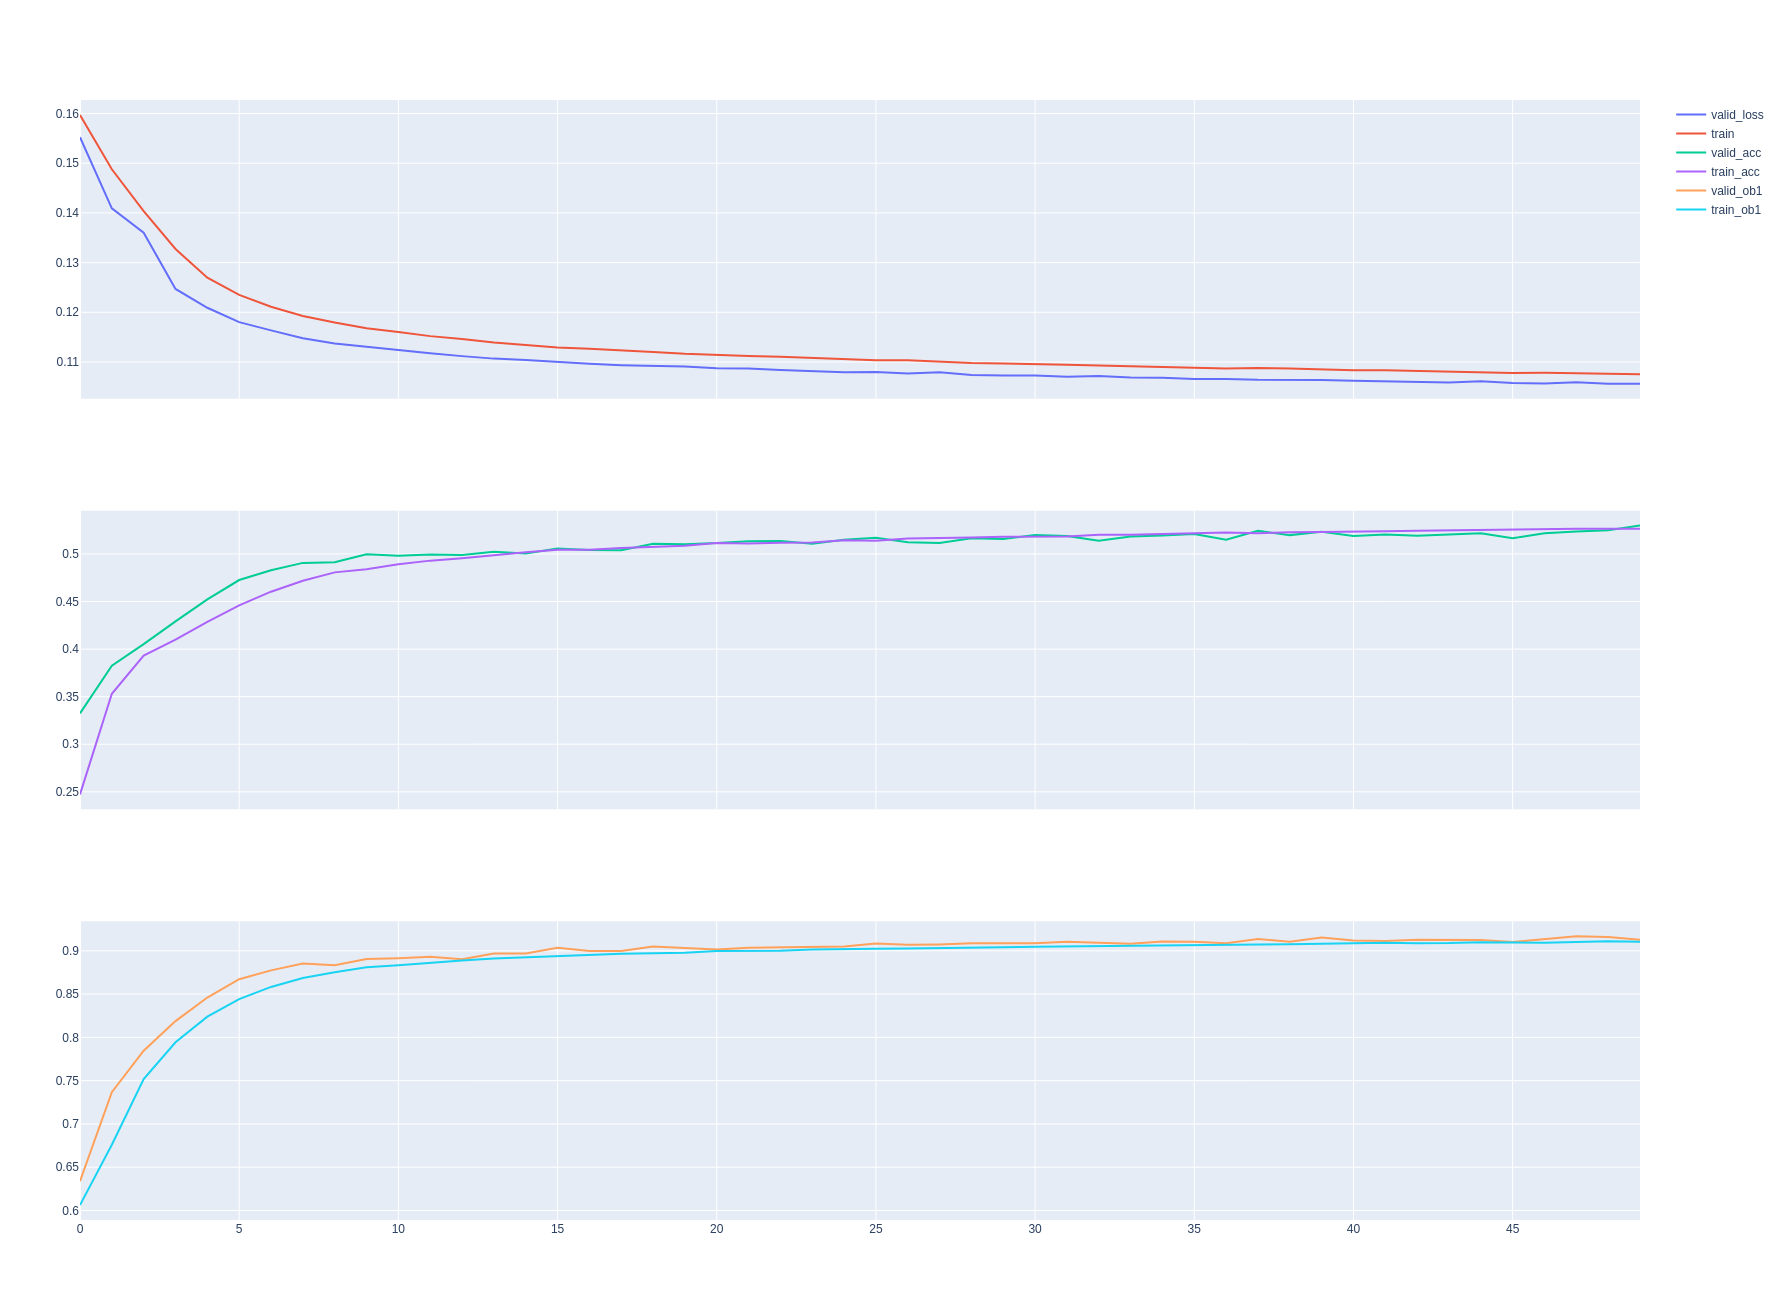

In [27]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)



fig.add_trace(go.Scatter(x=df.index, y=df["val_loss"],name="valid_loss"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["train_loss"],name="train"), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["val_acc"],name="valid_acc"), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["train_acc"],name="train_acc"), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["val_off_by_1"],name="valid_ob1"), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["train_off_by_1"],name="train_ob1"), row=3, col=1)


#fig.add_trace(go.Scatter(x=residual.index, y=residual,name="residual"), row=3, col=1)

fig.update_layout(height=1300)
fig.show()